# **Salt Segmentaion Detection Using Fast AI Library**

Several areas of Earth with large accumulations of oil and gas also have huge deposits of salt below the surface.

But unfortunately, knowing where large salt deposits are precisely is very difficult. Professional seismic imaging still requires expert human interpretation of salt bodies. This leads to very subjective, highly variable renderings. More alarmingly, it leads to potentially dangerous situations for oil and gas company drillers.

To create the most accurate seismic images and 3D renderings, TGS (the world’s leading geoscience data company) is hoping Kaggle’s machine learning community will be able to build an algorithm that automatically and accurately identifies if a subsurface target is salt or not.

In [ ]:
!pip install -Uqq fastbook
!pip install opendatasets
#import fastbook
#fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.2 MB/s 
     |████████████████████████████████| 1.2 MB 47.4 MB/s 
     |████████████████████████████████| 188 kB 75.0 MB/s 
     |████████████████████████████████| 46 kB 5.7 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 415 kB/s 


In [ ]:
#Importing Required Library
from fastai.vision import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import zipfile
import os
import pandas as pd
import numpy as np

In [ ]:
dataset_url = 'https://www.kaggle.com/c/tgs-salt-identification-challenge/data'

In [ ]:
import opendatasets as od
od.download(dataset_url)


  3%|▎         | 12.0M/445M [00:00<00:03, 123MB/s]

100%|██████████| 445M/445M [00:01<00:00, 255MB/s]



Extracting archive ./tgs-salt-identification-challenge/tgs-salt-identification-challenge.zip to ./tgs-salt-identification-challenge


In [ ]:
train_df = pd.read_csv('/content/tgs-salt-identification-challenge/train.csv')

In [ ]:
train_df.head()

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96 712 97 812 98 913 98 1015 97 1116 97 1216 98 1316 99 1416 8786
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 49 762 47 864 46 966 45 1068 44 1171 42 1273 41 1376 39 1478 38 1581 36 1683 35 1785 34 1888 32 1990 31 2092 30 2195 28 2297 27 2399 26 2501 25 2602 25 2704 24 2806 23 2907 23 3009 22 3110 22 3212 21 3313 21 3414 21 3516 20 3617 20 3718 20 3819 20 3921 19 4022 19 4123 19 4225 18 4326 18 4428 17 4529 17 4631 16 4733 15 4834 15 4936 14 5038 13 5140 12 5242 11 5344 8
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716 2 1817 2 1918 2 2018 3 2119 3 2220 3 2321 3 2422 3 2523 3 2624 3 2725 3 2826 3 2927 3 3028 3 3129 3 3230 3 3331 3 3432 3 3533 3 3636 1 3737 1 3838 1 3938 2 4039 2 4140 2 4240 3 4341 3 4442 3 4542 4 4643 4 4744 4 4844 5 4945 5 5046 5 5146 6 5247 6 5347 7 5448 7 5549 7 5649 8 5750 8 5851 8 5952 8 6053 8 6154 8 6255 8 6355 9 6456 9 6557 9 6659 8 6760 8 6861 8 6962 8 7063 8 7164 8 7265 8 7367 7 7468 7 7569 7 7670 7 7772 6 7873 6 7974 6 8075 6 8177 5 8278 5 8379 5 8480 5 8582 4 8683 4 8784 4 8885 4 8986 4 9087 4 9188 4 9289 4 9389 5 9490 5 9591 5 9...


In [ ]:
train_df.shape


(4000, 2)

In [ ]:
#Checking Missing Data Values
train_df.isna().sum()


id             0
rle_mask    1562
dtype: int64

In [ ]:
with zipfile.ZipFile('/content/tgs-salt-identification-challenge/train.zip', 'r') as zip_ref:
    zip_ref.extractall(path='train_data')

In [ ]:
with zipfile.ZipFile('/content/tgs-salt-identification-challenge/test.zip', 'r') as zip_ref:
    zip_ref.extractall(path='test_data')

In [ ]:
#Getting Data for Traning
files = get_image_files(('/content/train_data/images'))
masks = get_image_files(('/content/train_data/masks'))

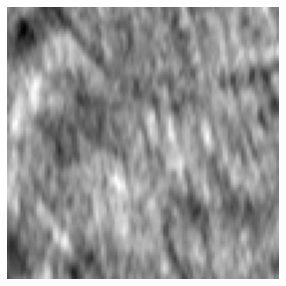

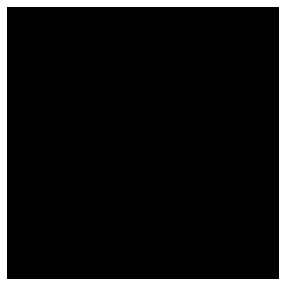

In [ ]:
# Checking image and mask
img = PILImage.create(files[451])
img.show(figsize = (5,5))

mask = PILImage.create(masks[451])
mask.show(figsize = (5,5))

In [ ]:
!pip install pycocotools

In [ ]:
  
"""
Lovasz-Softmax and Jaccard hinge loss in PyTorch
Maxim Berman 2018 ESAT-PSI KU Leuven (MIT License)
"""

from __future__ import print_function, division

import torch
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
try:
    from itertools import  ifilterfalse
except ImportError: # py3k
    from itertools import  filterfalse as ifilterfalse


def lovasz_grad(gt_sorted):
    """
    Computes gradient of the Lovasz extension w.r.t sorted errors
    See Alg. 1 in paper
    """
    p = len(gt_sorted)
    gts = gt_sorted.sum()
    intersection = gts - gt_sorted.float().cumsum(0)
    union = gts + (1 - gt_sorted).float().cumsum(0)
    jaccard = 1. - intersection / union
    if p > 1: # cover 1-pixel case
        jaccard[1:p] = jaccard[1:p] - jaccard[0:-1]
    return jaccard


def iou_binary(preds, labels, EMPTY=1., ignore=None, per_image=True):
    """
    IoU for foreground class
    binary: 1 foreground, 0 background
    """
    if not per_image:
        preds, labels = (preds,), (labels,)
    ious = []
    for pred, label in zip(preds, labels):
        intersection = ((label == 1) & (pred == 1)).sum()
        union = ((label == 1) | ((pred == 1) & (label != ignore))).sum()
        if not union:
            iou = EMPTY
        else:
            iou = float(intersection) / float(union)
        ious.append(iou)
    iou = mean(ious)    # mean accross images if per_image
    return 100 * iou


def iou(preds, labels, C, EMPTY=1., ignore=None, per_image=False):
    """
    Array of IoU for each (non ignored) class
    """
    if not per_image:
        preds, labels = (preds,), (labels,)
    ious = []
    for pred, label in zip(preds, labels):
        iou = []    
        for i in range(C):
            if i != ignore: # The ignored label is sometimes among predicted classes (ENet - CityScapes)
                intersection = ((label == i) & (pred == i)).sum()
                union = ((label == i) | ((pred == i) & (label != ignore))).sum()
                if not union:
                    iou.append(EMPTY)
                else:
                    iou.append(float(intersection) / float(union))
        ious.append(iou)
    ious = [mean(iou) for iou in zip(*ious)] # mean accross images if per_image
    return 100 * np.array(ious)


# --------------------------- BINARY LOSSES ---------------------------


def lovasz_hinge(logits, labels, per_image=True, ignore=None):
    """
    Binary Lovasz hinge loss
      logits: [B, H, W] Variable, logits at each pixel (between -\infty and +\infty)
      labels: [B, H, W] Tensor, binary ground truth masks (0 or 1)
      per_image: compute the loss per image instead of per batch
      ignore: void class id
    """
    if per_image:
        loss = mean(lovasz_hinge_flat(*flatten_binary_scores(log.unsqueeze(0), lab.unsqueeze(0), ignore))
                          for log, lab in zip(logits, labels))
    else:
        loss = lovasz_hinge_flat(*flatten_binary_scores(logits, labels, ignore))
    return loss


def lovasz_hinge_flat(logits, labels):
    """
    Binary Lovasz hinge loss
      logits: [P] Variable, logits at each prediction (between -\infty and +\infty)
      labels: [P] Tensor, binary ground truth labels (0 or 1)
      ignore: label to ignore
    """
    if len(labels) == 0:
        # only void pixels, the gradients should be 0
        return logits.sum() * 0.
    signs = 2. * labels.float() - 1.
    errors = (1. - logits * Variable(signs))
    errors_sorted, perm = torch.sort(errors, dim=0, descending=True)
    perm = perm.data
    gt_sorted = labels[perm]
    grad = lovasz_grad(gt_sorted)
    loss = torch.dot(F.relu(errors_sorted), Variable(grad))
    return loss


def flatten_binary_scores(scores, labels, ignore=None):
    """
    Flattens predictions in the batch (binary case)
    Remove labels equal to 'ignore'
    """
    scores = scores.view(-1)
    labels = labels.view(-1)
    if ignore is None:
        return scores, labels
    valid = (labels != ignore)
    vscores = scores[valid]
    vlabels = labels[valid]
    return vscores, vlabels


class StableBCELoss(torch.nn.modules.Module):
    def __init__(self):
         super(StableBCELoss, self).__init__()
    def forward(self, input, target):
         neg_abs = - input.abs()
         loss = input.clamp(min=0) - input * target + (1 + neg_abs.exp()).log()
         return loss.mean()


def binary_xloss(logits, labels, ignore=None):
    """
    Binary Cross entropy loss
      logits: [B, H, W] Variable, logits at each pixel (between -\infty and +\infty)
      labels: [B, H, W] Tensor, binary ground truth masks (0 or 1)
      ignore: void class id
    """
    logits, labels = flatten_binary_scores(logits, labels, ignore)
    loss = StableBCELoss()(logits, Variable(labels.float()))
    return loss


# --------------------------- MULTICLASS LOSSES ---------------------------


def lovasz_softmax(probas, labels, classes='present', per_image=False, ignore=None):
    """
    Multi-class Lovasz-Softmax loss
      probas: [B, C, H, W] Variable, class probabilities at each prediction (between 0 and 1).
              Interpreted as binary (sigmoid) output with outputs of size [B, H, W].
      labels: [B, H, W] Tensor, ground truth labels (between 0 and C - 1)
      classes: 'all' for all, 'present' for classes present in labels, or a list of classes to average.
      per_image: compute the loss per image instead of per batch
      ignore: void class labels
    """
    if per_image:
        loss = mean(lovasz_softmax_flat(*flatten_probas(prob.unsqueeze(0), lab.unsqueeze(0), ignore), classes=classes)
                          for prob, lab in zip(probas, labels))
    else:
        loss = lovasz_softmax_flat(*flatten_probas(probas, labels, ignore), classes=classes)
    return loss


def lovasz_softmax_flat(probas, labels, classes='present'):
    """
    Multi-class Lovasz-Softmax loss
      probas: [P, C] Variable, class probabilities at each prediction (between 0 and 1)
      labels: [P] Tensor, ground truth labels (between 0 and C - 1)
      classes: 'all' for all, 'present' for classes present in labels, or a list of classes to average.
    """
    if probas.numel() == 0:
        # only void pixels, the gradients should be 0
        return probas * 0.
    C = probas.size(1)
    losses = []
    class_to_sum = list(range(C)) if classes in ['all', 'present'] else classes
    for c in class_to_sum:
        fg = (labels == c).float() # foreground for class c
        if (classes is 'present' and fg.sum() == 0):
            continue
        if C == 1:
            if len(classes) > 1:
                raise ValueError('Sigmoid output possible only with 1 class')
            class_pred = probas[:, 0]
        else:
            class_pred = probas[:, c]
        errors = (Variable(fg) - class_pred).abs()
        errors_sorted, perm = torch.sort(errors, 0, descending=True)
        perm = perm.data
        fg_sorted = fg[perm]
        losses.append(torch.dot(errors_sorted, Variable(lovasz_grad(fg_sorted))))
    return mean(losses)


def flatten_probas(probas, labels, ignore=None):
    """
    Flattens predictions in the batch
    """
    if probas.dim() == 3:
        # assumes output of a sigmoid layer
        B, H, W = probas.size()
        probas = probas.view(B, 1, H, W)
    B, C, H, W = probas.size()
    probas = probas.permute(0, 2, 3, 1).contiguous().view(-1, C)  # B * H * W, C = P, C
    labels = labels.view(-1)
    if ignore is None:
        return probas, labels
    valid = (labels != ignore)
    vprobas = probas[valid.nonzero().squeeze()]
    vlabels = labels[valid]
    return vprobas, vlabels

def xloss(logits, labels, ignore=None):
    """
    Cross entropy loss
    """
    return F.cross_entropy(logits, Variable(labels), ignore_index=255)


# --------------------------- HELPER FUNCTIONS ---------------------------
def isnan(x):
    return x != x
    
    
def mean(l, ignore_nan=False, empty=0):
    """
    nanmean compatible with generators.
    """
    l = iter(l)
    if ignore_nan:
        l = ifilterfalse(isnan, l)
    try:
        n = 1
        acc = next(l)
    except StopIteration:
        if empty == 'raise':
            raise ValueError('Empty mean')
        return empty
    for n, v in enumerate(l, 2):
        acc += v
    if n == 1:
        return acc
    return acc / n

In [ ]:
from pycocotools import mask as cocomask
from fastai.vision.all import *

def get_segmentations(labeled):
    nr_true = int(labeled.max())
    segmentations = []
    for i in range(1, nr_true + 1):
        msk = labeled == i
        segmentation = rle_from_binary(msk.astype('uint8'))
        segmentation['counts'] = segmentation['counts'].decode("UTF-8")
        segmentations.append(segmentation)
    return segmentations

def compute_precision_at(ious, threshold):
    mx1 = np.max(ious, axis=0)
    mx2 = np.max(ious, axis=1)
    tp = np.sum(mx2 >= threshold)
    fp = np.sum(mx2 < threshold)
    fn = np.sum(mx1 < threshold)
    return float(tp) / (tp + fp + fn)

def compute_ious(gt, predictions):
    gt_ = get_segmentations(gt)
    predictions_ = get_segmentations(predictions)

    if len(gt_) == 0 and len(predictions_) == 0:
        return np.ones((1, 1))
    elif len(gt_) != 0 and len(predictions_) == 0:
        return np.zeros((1, 1))
    else:
        iscrowd = [0 for _ in predictions_]
        ious = cocomask.iou(gt_, predictions_, iscrowd)
        if not np.array(ious).size:
            ious = np.zeros((1, 1))
        return ious

def compute_eval_metric(gt, predictions):
    thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
    ious = compute_ious(gt, predictions)
    precisions = [compute_precision_at(ious, th) for th in thresholds]
    return sum(precisions) / len(precisions)

def intersection_over_union_thresholds(y_true, y_pred):
    iouts = []
    for y_t, y_p in list(zip(y_true, y_pred)):
        iouts.append(compute_eval_metric(y_t, y_p))
    return np.mean(iouts)

def rle_from_binary(prediction):
    prediction = np.asfortranarray(prediction)
    return cocomask.encode(prediction)

def intersection_over_union(y_true, y_pred):
    ious = []
    for y_t, y_p in list(zip(y_true, y_pred)):
        iou = compute_ious(y_t, y_p)
        iou_mean = 1.0 * np.sum(iou) / len(iou)
        ious.append(iou_mean)
    return np.mean(ious)

def my_eval(pred,targ):
    pred = to_np(torch.sigmoid(pred[0]))
    targ = to_np(targ)
    losses = []
    for i in range(targ.shape[0]):
        losses.append(compute_eval_metric(targ[i],((pred[i]>0.5).astype(np.uint8))))
    return np.mean(losses)

def meanapv1(pred,targ):
    pred = to_np(torch.sigmoid(pred.squeeze()))
    targ = to_np(targ)
    losses = []
    for i in range(targ.shape[0]):
        losses.append(compute_eval_metric(targ[i],((pred[i]>0.5).astype(np.uint8))))
    return np.mean(losses)

def meanapv2(pred,targ):
    pred = to_np(torch.sigmoid(pred[0]))
    targ = to_np(targ)
    losses = []
    for i in range(targ.shape[0]):
        losses.append(compute_eval_metric(targ[i],((pred[i]>0.5).astype(np.uint8))))
    return np.mean(losses)

def RLenc(img, order='F', format=True):
    """
    img is binary mask image, shape (r,c)
    order is down-then-right, i.e. Fortran
    format determines if the order needs to be preformatted (according to submission rules) or not
    returns run length as an array or string (if format is True)
    """
    bytes = img.reshape(img.shape[0] * img.shape[1], order=order)
    runs = []  ## list of run lengths
    r = 0  ## the current run length
    pos = 1  ## count starts from 1 per WK
    for c in bytes:
        if (c == 0):
            if r != 0:
                runs.append((pos, r))
                pos += r
                r = 0
            pos += 1
        else:
            r += 1

    # if last run is unsaved (i.e. data ends with 1)
    if r != 0:
        runs.append((pos, r))
        pos += r
        r = 0

    if format:
        z = ''

        for rr in runs:
            z += '{} {} '.format(rr[0], rr[1])
        return z[:-1]
    else:
        return runs


In [ ]:
def meanapv1(pred,targ):
    pred = to_np(torch.sigmoid(pred.squeeze()))
    targ = to_np(targ)
    losses = []
    for i in range(targ.shape[0]):
        losses.append(compute_eval_metric(targ[i],((pred[i]>0.5).astype(np.uint8))))
    return np.mean(losses)

from fastai.metrics import Dice
def accuracy_pixel(input, target):
    target = target.squeeze(1)
    mask = target != 0
    return (input.argmax(dim=1)[mask] == target[mask]).float().mean()

In [ ]:
def get_mask(fname:Path): return str(fname).replace('images','masks')
segments = DataBlock(blocks = (ImageBlock(), MaskBlock()),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=0)
                 ,get_y=get_mask,

                     batch_tfms = [IntToFloatTensor(div_mask=255),Brightness(0.1,p=0.25),Zoom(max_zoom=1.1,p=0.25),Normalize.from_stats(*imagenet_stats)],
                 

                     
                 )
dls = segments.dataloaders('/content/train_data/images')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


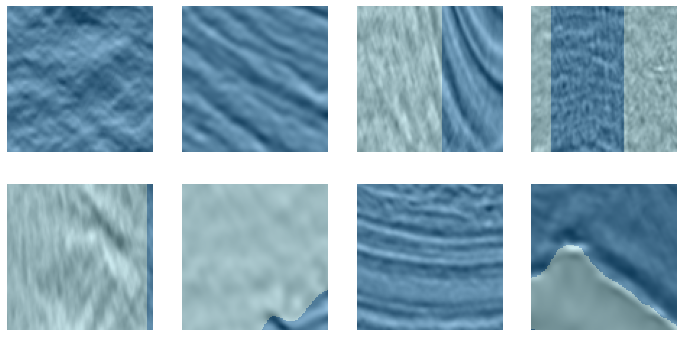

In [ ]:
dls.show_batch(nrows=2,ncols=4)

In [ ]:
learn = unet_learner(dls = dls, 
                     arch = resnet34, 
                     pretrained = True,
                     normalize = False,
                     n_in=3, 
                     n_out=1,
                     loss_func = lovasz_hinge,
                     metrics= [iou_binary,accuracy_pixel,Dice,meanapv1]
                    )

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=0.00015848931798245758)

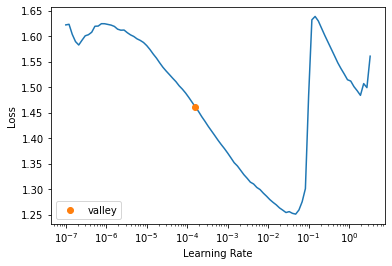

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(1)
learn.unfreeze()

epoch,train_loss,valid_loss,iou_binary,accuracy_pixel,dice,meanapv1,time
0,1.079409,1.007887,40.500000,0.000000,0.000000,0.248625,00:29


epoch,train_loss,valid_loss,iou_binary,accuracy_pixel,dice,meanapv1,time
0,0.932701,0.869444,40.500000,0.000000,0.000000,0.581750,00:31


In [ ]:
learn.fine_tune(10,base_lr = 3e-3)

epoch,train_loss,valid_loss,iou_binary,accuracy_pixel,dice,meanapv1,time
0,1.468856,1.025586,40.500000,0.000000,0.000000,0.030750,00:29


epoch,train_loss,valid_loss,iou_binary,accuracy_pixel,dice,meanapv1,time
0,0.800504,0.671453,40.500000,0.000000,0.000000,0.628500,00:30
1,0.639140,0.608805,40.500000,0.000000,0.000000,0.628000,00:30
2,0.550775,0.746027,40.500000,0.000000,0.000000,0.680000,00:30
3,0.468669,0.477394,40.500018,0.000000,0.000000,0.732000,00:30
4,0.406102,0.500745,40.500000,0.000000,0.000000,0.737625,00:30
5,0.358232,0.446991,40.500000,0.000000,0.000000,0.753500,00:30
6,0.307277,0.409729,40.500000,0.000000,0.000000,0.768250,00:30
7,0.272570,0.401955,40.500000,0.000000,0.000000,0.766500,00:30
8,0.250102,0.405210,40.500000,0.000000,0.000000,0.769375,00:30
9,0.231964,0.398985,40.500000,0.000000,0.000000,0.769000,00:30


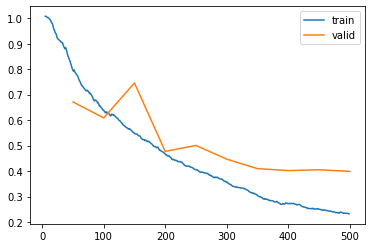

In [ ]:
learn.recorder.plot_loss()

In [ ]:
files[7]

Path('/content/train_data/images/a49edf33ae.png')

In [ ]:
import cv2 as cv

In [ ]:
files[5]

Path('/content/train_data/images/bfac8e63cb.png')

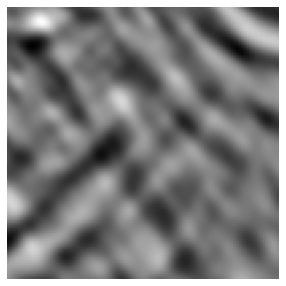

In [ ]:
img = PILImage.create(files[5])
img.show(figsize = (5,5))

In [ ]:
torch.tensor(cv.imread(str(files[5])))


tensor([[[ 97,  97,  97],
         [ 91,  91,  91],
         [ 94,  94,  94],
         ...,
         [ 44,  44,  44],
         [ 44,  44,  44],
         [ 48,  48,  48]],

        [[ 94,  94,  94],
         [ 86,  86,  86],
         [ 88,  88,  88],
         ...,
         [ 38,  38,  38],
         [ 36,  36,  36],
         [ 39,  39,  39]],

        [[100, 100, 100],
         [ 93,  93,  93],
         [ 94,  94,  94],
         ...,
         [ 39,  39,  39],
         [ 36,  36,  36],
         [ 35,  35,  35]],

        ...,

        [[153, 153, 153],
         [147, 147, 147],
         [141, 141, 141],
         ...,
         [110, 110, 110],
         [108, 108, 108],
         [107, 107, 107]],

        [[147, 147, 147],
         [140, 140, 140],
         [131, 131, 131],
         ...,
         [113, 113, 113],
         [109, 109, 109],
         [108, 108, 108]],

        [[142, 142, 142],
         [134, 134, 134],
         [124, 124, 124],
         ...,
         [118, 118, 118],
        

In [ ]:
learn.predict(torch.tensor(cv.imread(str(files[5]))))


(TensorMask([[[-1.5003, -1.4299, -1.3223,  ...,  0.1946,  0.2655,  0.2517],
          [-1.4299, -1.4929, -1.3624,  ...,  0.0358,  0.1140,  0.2102],
          [-1.4216, -1.4258, -1.3609,  ..., -0.2876, -0.1696, -0.0103],
          ...,
          [-1.2337, -1.2448, -1.2131,  ..., -1.1149, -1.1067, -1.0918],
          [-1.1772, -1.2086, -1.1967,  ..., -1.1118, -1.1049, -1.1051],
          [-1.1897, -1.1653, -1.2042,  ..., -1.1374, -1.1121, -1.1425]]]),
 TensorBase([[[-1.5003, -1.4299, -1.3223,  ...,  0.1946,  0.2655,  0.2517],
          [-1.4299, -1.4929, -1.3624,  ...,  0.0358,  0.1140,  0.2102],
          [-1.4216, -1.4258, -1.3609,  ..., -0.2876, -0.1696, -0.0103],
          ...,
          [-1.2337, -1.2448, -1.2131,  ..., -1.1149, -1.1067, -1.0918],
          [-1.1772, -1.2086, -1.1967,  ..., -1.1118, -1.1049, -1.1051],
          [-1.1897, -1.1653, -1.2042,  ..., -1.1374, -1.1121, -1.1425]]]),
 TensorBase([[[-1.5003, -1.4299, -1.3223,  ...,  0.1946,  0.2655,  0.2517],
          [-1.42

In [ ]:
learn.export()


In [ ]:
learn_inf = load_learner('/content/export.pkl')

In [ ]:
learn_inf.predict('/content/train_data/images/19843b4e95.png')
y = learn_inf.predict('/content/train_data/images/19843b4e95.png')


In [ ]:
print(y[0])

TensorMask([[[-1.2750, -1.2458, -1.2329,  ..., -1.2738, -1.1832, -1.2452],
         [-1.2394, -1.3258, -1.2644,  ..., -1.2887, -1.2556, -1.1880],
         [-1.2836, -1.3013, -1.2279,  ..., -1.2770, -1.2669, -1.2783],
         ...,
         [-1.2036, -1.2173, -1.2173,  ..., -1.1702, -1.1648, -1.1450],
         [-1.1334, -1.1826, -1.1927,  ..., -1.1641, -1.1502, -1.1551],
         [-1.1542, -1.1508, -1.1968,  ..., -1.1921, -1.1619, -1.1924]]])


In [ ]:
img = dls.train_ds[5][0]

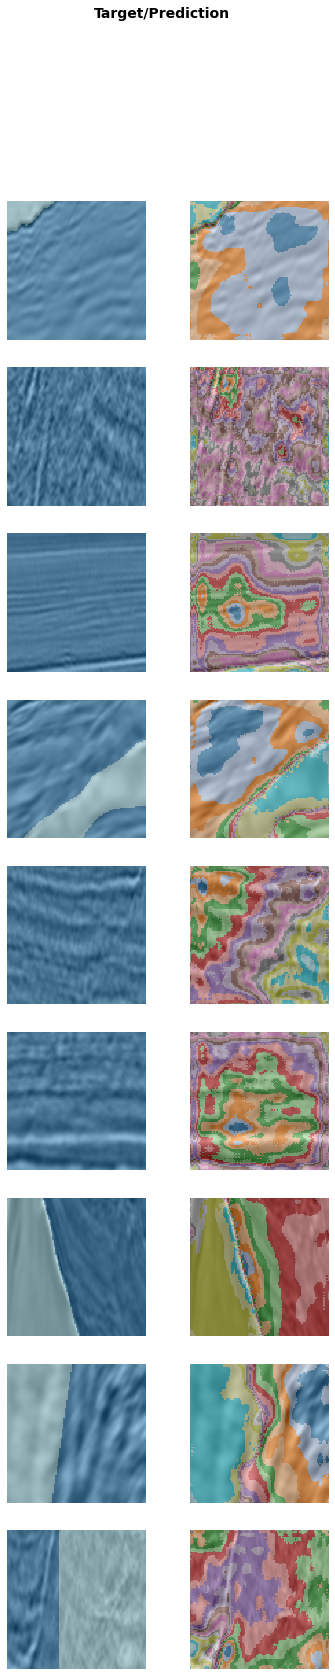

In [ ]:
learn.show_results()

In [ ]:
test_images = get_image_files(('/content/test_data/images'))


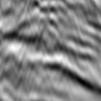

In [ ]:
img = PILImage.create(test_images[4254])
img

In [ ]:
lbl = learn.predict(img)
lbl

(TensorMask([[[-1.3067, -1.2503, -1.2011,  ..., -1.2160, -1.1098, -1.1363],
          [-1.2495, -1.3197, -1.2312,  ..., -1.2241, -1.1970, -1.0978],
          [-1.2648, -1.2837, -1.2264,  ..., -1.2486, -1.2307, -1.1788],
          ...,
          [-1.4049, -1.4063, -1.3806,  ..., -1.3144, -1.3065, -1.2886],
          [-1.3395, -1.3725, -1.3683,  ..., -1.3047, -1.2884, -1.2876],
          [-1.3616, -1.3346, -1.3920,  ..., -1.3321, -1.2959, -1.3261]]]),
 TensorBase([[[-1.3067, -1.2503, -1.2011,  ..., -1.2160, -1.1098, -1.1363],
          [-1.2495, -1.3197, -1.2312,  ..., -1.2241, -1.1970, -1.0978],
          [-1.2648, -1.2837, -1.2264,  ..., -1.2486, -1.2307, -1.1788],
          ...,
          [-1.4049, -1.4063, -1.3806,  ..., -1.3144, -1.3065, -1.2886],
          [-1.3395, -1.3725, -1.3683,  ..., -1.3047, -1.2884, -1.2876],
          [-1.3616, -1.3346, -1.3920,  ..., -1.3321, -1.2959, -1.3261]]]),
 TensorBase([[[-1.3067, -1.2503, -1.2011,  ..., -1.2160, -1.1098, -1.1363],
          [-1.24

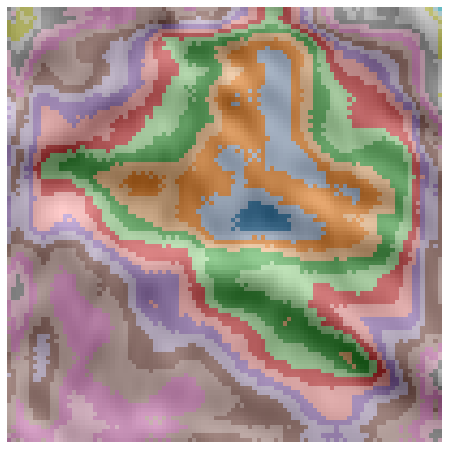

In [ ]:
_,axs = plt.subplots(1,1, figsize=(8,8))
img.show(ctx=axs)
lbl[0].show(ctx=axs)

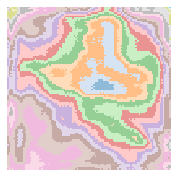

In [ ]:
lbl[0].show()

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred = learn_inf.predict(img)

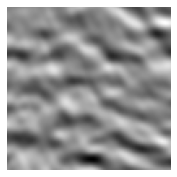

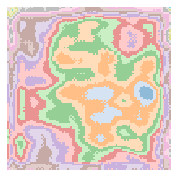

In [ ]:
img.show()
pred[0].show()

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

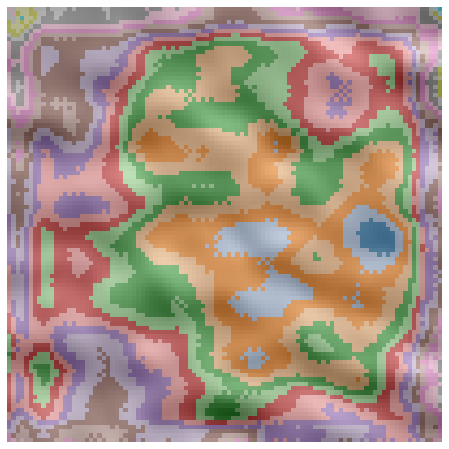

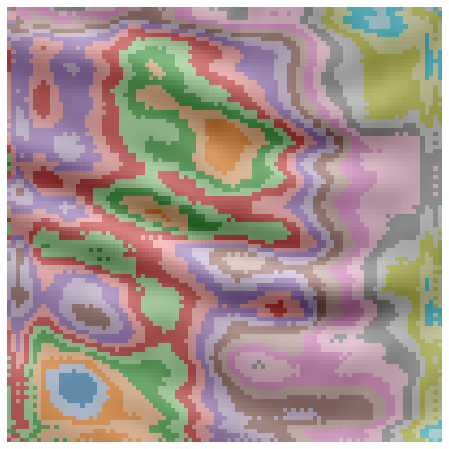

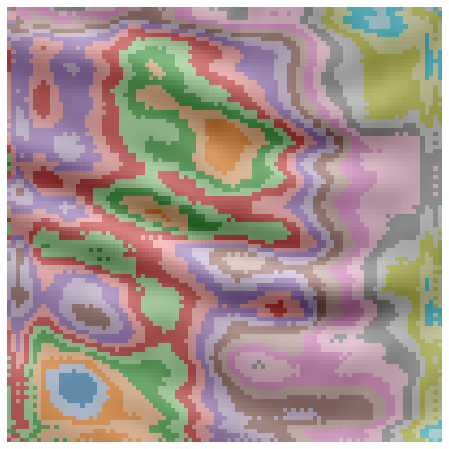

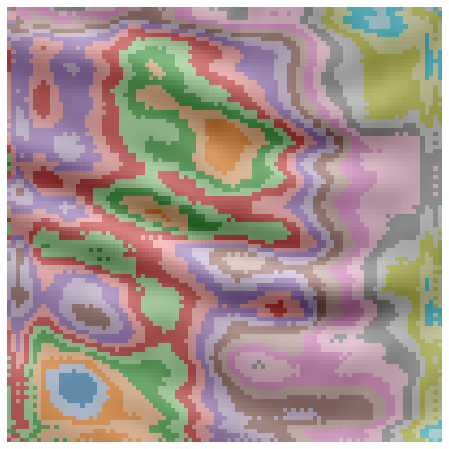

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    _,axs = plt.subplots(1,1, figsize=(8,8))
    img.show(ctx=axs)
    pred[0].show(ctx=axs)
btn_run = widgets.Button(description='Classify')

btn_run.on_click(on_click_classify)

btn_upload = widgets.FileUpload()


VBox([widgets.Label('Upload Your Image'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Upload Your Image'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
import session_info
session_info.show()